In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import sys
from tqdm import tqdm
import pathlib
from pathlib import Path
import contextlib
import io
import go_pybindings as go
import gaps_online.db as db

Can't load CXX API! No module named 'gaps_tof'


In [2]:
plt.style.use('publication.rc')

In [4]:
run_id = 30198
f_names = ['/Users/gracetytus/gaps/met_analysis/intermediaries/output_'+ str(run_id) +'.txt']

with open(f_names[0]) as in_file:
    variables = next(in_file).strip().split(',')
num_lines = -len(f_names)
for name in f_names:
    with open(name) as in_file:
        num_lines += sum(1 for _ in in_file)
data_dict = {}
for var in variables:
    data_dict[var] = np.zeros(num_lines)

k = 0
progress_bar = tqdm(total=num_lines)
for name in f_names:
    with open(name) as in_file:
        next(in_file)
        for line in in_file:
            for j, dat in enumerate(line.strip().split(',')):
                data_dict[variables[j]][k] = float(dat)
            k += 1
            progress_bar.update(1)

  0%|                                                   | 0/986 [00:00<?, ?it/s]

In [6]:
dy_dx = np.gradient(data_dict['percent_dropped_hg'], data_dict['met'])

threshold = 0.01

try:
    # Find the index where the derivative is close to zero
    stable_idx = np.where((np.abs(dy_dx) < threshold))[0]
except Exception as e: pass


# The first occurrence of stability
if len(stable_idx) > 0:
    transition_point = [stable_idx[0]]

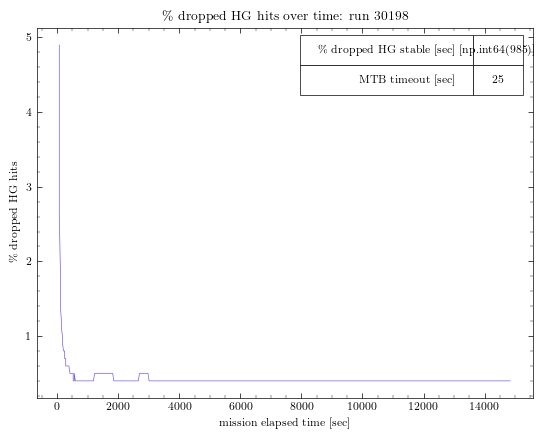

In [11]:
te_timeout = 25

fig, ax = plt.subplots()
ax.plot(data_dict['met'], data_dict['percent_dropped_hg'])
ax.set_title('\\% dropped HG hits over time: run ' + str(run_id))
ax.set_xlabel('mission elapsed time [sec]')
ax.set_ylabel('\\% dropped HG hits')
ax.minorticks_on()

table_data = [['\\% dropped HG stable [sec]', str(transition_point)], ['MTB timeout [sec]', str(te_timeout)]]

table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='upper right')

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.0, 1.0)

num_rows, num_cols = len(table_data), len(table_data[0])

for (row, col), cell in table.get_celld().items():
    if row == -1 or col == -1:
        continue

    cell.set_height(0.08)

    if col == 1:
        cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        cell.set_width(0.1)
    else: 
        cell.set_text_props(horizontalalignment='right', verticalalignment='center')
        cell.set_width(0.35)
        
    cell.set_linewidth(0.5)
plt.savefig(str(run_id) + 'droppedHG.pdf')